<a href="https://colab.research.google.com/github/calmrocks/master-machine-learning-engineer/blob/main/BasicModels/DeepLearningTrainingProcess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding Deep Learning Training Process

## Introduction
This notebook demonstrates the training process in deep learning, focusing on:
1. Forward Propagation
2. Loss Calculation
3. Backward Propagation
4. Parameter Updates

We'll implement a simple neural network from scratch to understand these concepts better.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple

## 1. Creating a Simple Neural Network Class

First, let's create a simple neural network with one hidden layer to understand the training process:class SimpleNeuralNetwork:


In [6]:
class SimpleNeuralNetwork:
    def __init__(self, input_size: int, hidden_size: int, output_size: int):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

        # Store parameters and gradients
        self.parameters = {'W1': self.W1, 'b1': self.b1, 'W2': self.W2, 'b2': self.b2}
        self.gradients = {}
        self.cache = {}

    def sigmoid(self, Z: np.ndarray) -> np.ndarray:
        return 1 / (1 + np.exp(-Z))

    def sigmoid_derivative(self, Z: np.ndarray) -> np.ndarray:
        s = self.sigmoid(Z)
        return s * (1 - s)

    def forward_propagation(self, X: np.ndarray) -> np.ndarray:
        # First layer
        Z1 = np.dot(X, self.W1) + self.b1
        A1 = self.sigmoid(Z1)

        # Second layer
        Z2 = np.dot(A1, self.W2) + self.b2
        A2 = self.sigmoid(Z2)

        # Store values for backpropagation
        self.cache = {
            'Z1': Z1, 'A1': A1,
            'Z2': Z2, 'A2': A2,
            'X': X
        }

        return A2

    def compute_loss(self, Y: np.ndarray, Y_hat: np.ndarray) -> float:
        m = Y.shape[0]
        loss = -1/m * np.sum(Y * np.log(Y_hat) + (1 - Y) * np.log(1 - Y_hat))
        return loss

    def backward_propagation(self, Y: np.ndarray) -> None:
        m = Y.shape[0]

        # Output layer
        dZ2 = self.cache['A2'] - Y
        dW2 = 1/m * np.dot(self.cache['A1'].T, dZ2)
        db2 = 1/m * np.sum(dZ2, axis=0, keepdims=True)

        # Hidden layer
        dZ1 = np.dot(dZ2, self.W2.T) * self.sigmoid_derivative(self.cache['Z1'])
        dW1 = 1/m * np.dot(self.cache['X'].T, dZ1)
        db1 = 1/m * np.sum(dZ1, axis=0, keepdims=True)

        # Store gradients
        self.gradients = {
            'dW1': dW1, 'db1': db1,
            'dW2': dW2, 'db2': db2
        }

    def update_parameters(self, learning_rate: float) -> None:
        self.W1 -= learning_rate * self.gradients['dW1']
        self.b1 -= learning_rate * self.gradients['db1']
        self.W2 -= learning_rate * self.gradients['dW2']
        self.b2 -= learning_rate * self.gradients['db2']

        # Update stored parameters
        self.parameters = {'W1': self.W1, 'b1': self.b1, 'W2': self.W2, 'b2': self.b2}

## 2. Generate Sample Data

Let's create a simple binary classification problem to demonstrate the training process:

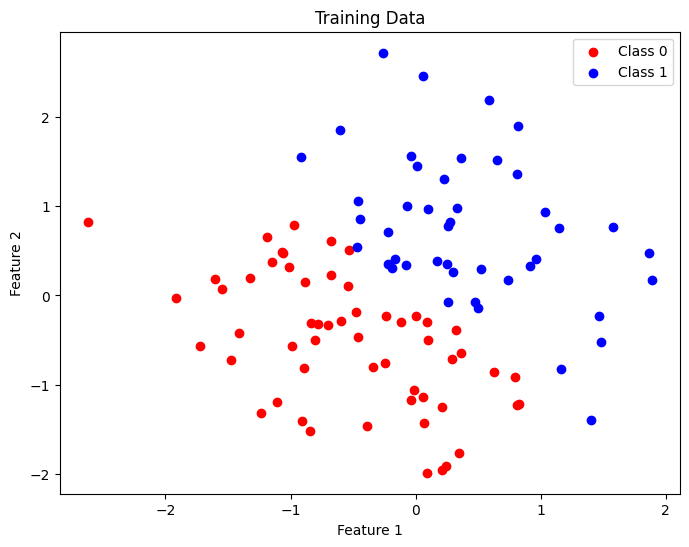

In [2]:
# Generate synthetic data
np.random.seed(42)
X = np.random.randn(100, 2)  # 100 samples, 2 features
Y = np.array([(x[0] + x[1] > 0).astype(int) for x in X]).reshape(-1, 1)

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X[Y.ravel()==0][:, 0], X[Y.ravel()==0][:, 1], c='red', label='Class 0')
plt.scatter(X[Y.ravel()==1][:, 0], X[Y.ravel()==1][:, 1], c='blue', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Data')
plt.legend()
plt.show()

## 3. Training Process Visualization

Let's create functions to visualize the training process:

In [7]:
class TrainingVisualizer:
    def __init__(self):
        self.losses = []
        self.weight_changes = {'W1': [], 'W2': []}
        self.gradient_magnitudes = {'W1': [], 'W2': []}

    def record_step(self, model: SimpleNeuralNetwork, loss: float):
        self.losses.append(loss)

        # Record weight changes
        for layer in ['W1', 'W2']:
            self.weight_changes[layer].append(np.mean(np.abs(model.parameters[layer])))
            self.gradient_magnitudes[layer].append(np.mean(np.abs(model.gradients[f'd{layer}'])))

    def plot_training_progress(self):
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

        # Plot loss
        ax1.plot(self.losses)
        ax1.set_title('Loss over time')
        ax1.set_xlabel('Iteration')
        ax1.set_ylabel('Loss')

        # Plot weight changes
        for layer in ['W1', 'W2']:
            ax2.plot(self.weight_changes[layer], label=f'Layer {layer}')
        ax2.set_title('Average Weight Magnitudes')
        ax2.set_xlabel('Iteration')
        ax2.set_ylabel('Magnitude')
        ax2.legend()

        # Plot gradient magnitudes
        for layer in ['W1', 'W2']:
            ax3.plot(self.gradient_magnitudes[layer], label=f'Layer {layer}')
        ax3.set_title('Average Gradient Magnitudes')
        ax3.set_xlabel('Iteration')
        ax3.set_ylabel('Magnitude')
        ax3.legend()

        plt.tight_layout()
        plt.show()

## 4. Training Loop with Detailed Monitoring

Epoch 0, Loss: 0.6951
Epoch 100, Loss: 0.6849
Epoch 200, Loss: 0.6806
Epoch 300, Loss: 0.6630
Epoch 400, Loss: 0.6057
Epoch 500, Loss: 0.5000
Epoch 600, Loss: 0.3879
Epoch 700, Loss: 0.3008
Epoch 800, Loss: 0.2401
Epoch 900, Loss: 0.1984


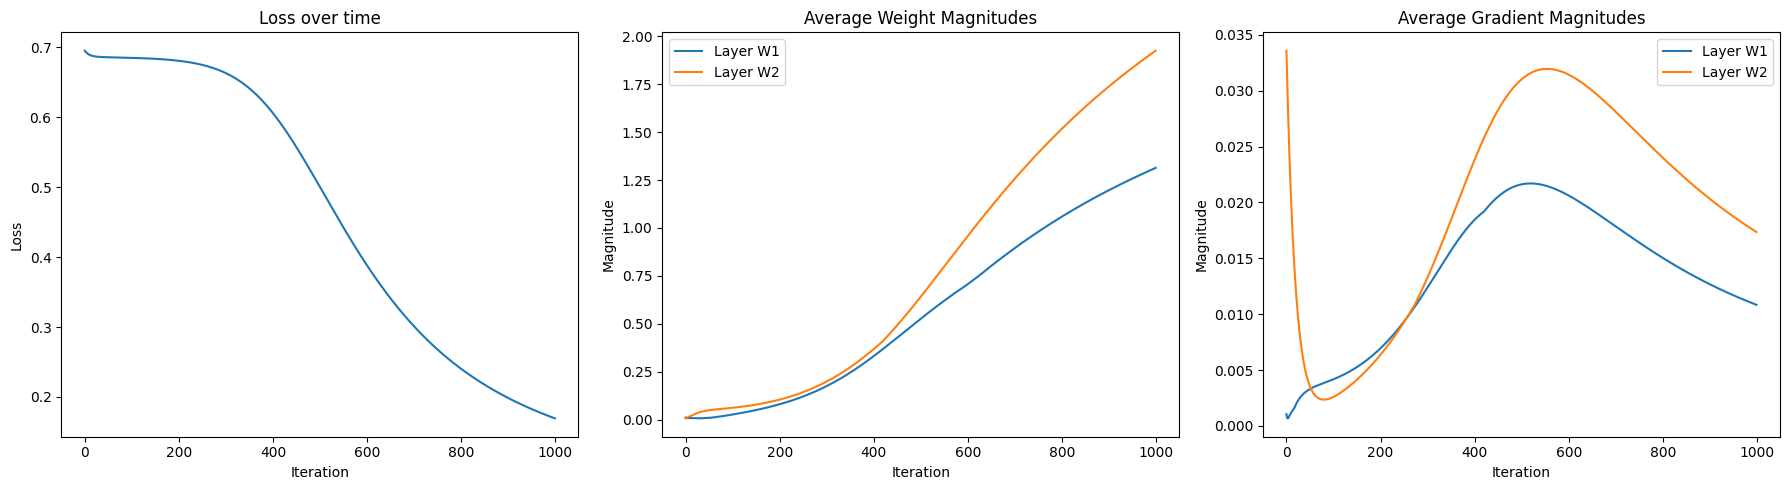

In [8]:
def train_model_with_visualization(X: np.ndarray, Y: np.ndarray,
                                 hidden_size: int = 4,
                                 learning_rate: float = 0.1,
                                 epochs: int = 1000) -> Tuple[SimpleNeuralNetwork, TrainingVisualizer]:
    # Initialize model and visualizer
    model = SimpleNeuralNetwork(X.shape[1], hidden_size, 1)
    visualizer = TrainingVisualizer()

    # Training loop
    for i in range(epochs):
        # Forward propagation
        Y_hat = model.forward_propagation(X)

        # Compute loss
        loss = model.compute_loss(Y, Y_hat)

        # Backward propagation
        model.backward_propagation(Y)

        # Update parameters
        model.update_parameters(learning_rate)

        # Record metrics
        visualizer.record_step(model, loss)

        # Print progress
        if i % 100 == 0:
            print(f"Epoch {i}, Loss: {loss:.4f}")

    return model, visualizer

# Train the model
model, visualizer = train_model_with_visualization(X, Y)

# Plot training progress
visualizer.plot_training_progress()

## 5. Visualizing Decision Boundary and Predictions

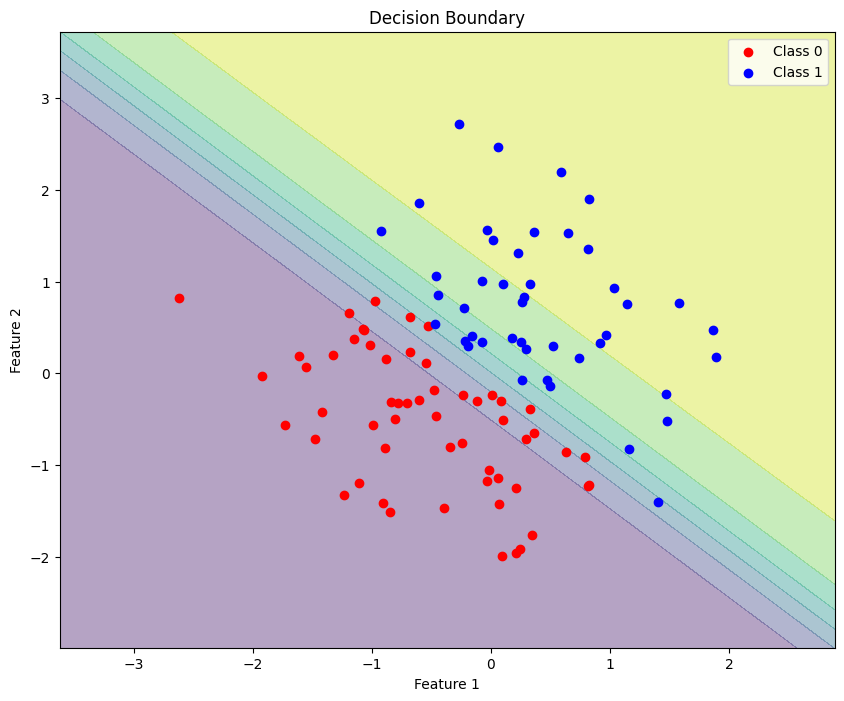

In [9]:
def plot_decision_boundary(model: SimpleNeuralNetwork, X: np.ndarray, Y: np.ndarray):
    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))

    # Make predictions on mesh grid
    Z = model.forward_propagation(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[Y.ravel()==0][:, 0], X[Y.ravel()==0][:, 1], c='red', label='Class 0')
    plt.scatter(X[Y.ravel()==1][:, 0], X[Y.ravel()==1][:, 1], c='blue', label='Class 1')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.legend()
    plt.show()

plot_decision_boundary(model, X, Y)

## 6. Analyzing Parameter Changes During Training

Let's examine how parameters change during different phases of training:

In [10]:
def analyze_parameter_changes(visualizer: TrainingVisualizer):
    # Divide training into early, middle, and late phases
    n_steps = len(visualizer.losses)
    phases = {
        'Early': slice(0, n_steps//3),
        'Middle': slice(n_steps//3, 2*n_steps//3),
        'Late': slice(2*n_steps//3, n_steps)
    }

    # Calculate statistics for each phase
    stats = {}
    for phase_name, phase_slice in phases.items():
        stats[phase_name] = {
            'avg_loss': np.mean(visualizer.losses[phase_slice]),
            'avg_gradient_W1': np.mean(visualizer.gradient_magnitudes['W1'][phase_slice]),
            'avg_gradient_W2': np.mean(visualizer.gradient_magnitudes['W2'][phase_slice])
        }

    # Print statistics
    print("\nTraining Phase Analysis:")
    for phase, metrics in stats.items():
        print(f"\n{phase} Phase:")
        print(f"Average Loss: {metrics['avg_loss']:.4f}")
        print(f"Average Gradient Magnitude (W1): {metrics['avg_gradient_W1']:.4f}")
        print(f"Average Gradient Magnitude (W2): {metrics['avg_gradient_W2']:.4f}")

analyze_parameter_changes(visualizer)


Training Phase Analysis:

Early Phase:
Average Loss: 0.6788
Average Gradient Magnitude (W1): 0.0067
Average Gradient Magnitude (W2): 0.0079

Middle Phase:
Average Loss: 0.4977
Average Gradient Magnitude (W1): 0.0198
Average Gradient Magnitude (W2): 0.0280

Late Phase:
Average Loss: 0.2326
Average Gradient Magnitude (W1): 0.0144
Average Gradient Magnitude (W2): 0.0230


## 7. Key Observations and Best Practices

### Training Process:
1. **Forward Propagation**:
   - Input data flows through the network
   - Each layer applies weights, biases, and activation functions
   - Values are cached for backward propagation

2. **Loss Calculation**:
   - Measures the difference between predictions and true values
   - Guides the optimization process

3. **Backward Propagation**:
   - Computes gradients for all parameters
   - Uses chain rule to propagate error backwards
   - Gradients indicate how to adjust parameters

4. **Parameter Updates**:
   - Learning rate controls the size of updates
   - Too large: unstable training
   - Too small: slow convergence

### Common Issues and Solutions:
1. **Vanishing/Exploding Gradients**:
   - Use appropriate initialization
   - Consider different activation functions
   - Implement gradient clipping

2. **Poor Convergence**:
   - Adjust learning rate
   - Try different optimizers
   - Check data preprocessing

3. **Overfitting**:
   - Add regularization
   - Use dropout
   - Increase training data